<a href="https://colab.research.google.com/github/Arshapjoy/Movie_Recommendation_System_Project/blob/main/notebooks/2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [32]:
combined_df=pd.read_csv("/content/drive/MyDrive/MCA_project/Final/combined_cleaned.csv")

In [33]:
combined_df.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,runtimeMinutes,genre,originalLanguage,director,writer,distributor,reviewId,originalScore,reviewText,scoreSentiment,originalScore_normalized
0,love_lies,"Love, Lies",43.0,66.920339,Unknown,Unknown,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",Unknown,2739073.0,4/5,Though let down by its routine love triangle n...,POSITIVE,8.0
1,love_lies,"Love, Lies",43.0,66.920339,Unknown,Unknown,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",Unknown,2333658.0,3.5/5,"While not perfect, Love, Lies is a worthy disc...",POSITIVE,7.0
2,adrift_2018,Adrift,65.0,69.000000,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",120.0,"Adventure, Drama, Romance",English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",STX Films,102694850.0,6/10,This is nowhere near the level of other great ...,POSITIVE,6.0
3,adrift_2018,Adrift,65.0,69.000000,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",120.0,"Adventure, Drama, Romance",English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",STX Films,2816011.0,C+,"For almost the entire runtime, the only people...",NEGATIVE,7.0
4,adrift_2018,Adrift,65.0,69.000000,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",120.0,"Adventure, Drama, Romance",English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",STX Films,2772153.0,2/5,What is meant to be a voyage of self-discovery...,NEGATIVE,4.0


In [34]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993876 entries, 0 to 993875
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        993876 non-null  object 
 1   title                     993876 non-null  object 
 2   audienceScore             993876 non-null  float64
 3   tomatoMeter               993876 non-null  float64
 4   rating                    993876 non-null  object 
 5   ratingContents            993876 non-null  object 
 6   runtimeMinutes            993876 non-null  float64
 7   genre                     993876 non-null  object 
 8   originalLanguage          993876 non-null  object 
 9   director                  993876 non-null  object 
 10  writer                    993876 non-null  object 
 11  distributor               993876 non-null  object 
 12  reviewId                  993876 non-null  float64
 13  originalScore             993876 non-null  o

In [36]:
combined_df.describe()

,audienceScore,tomatoMeter,runtimeMinutes,reviewId,originalScore_normalized
count,993876.000000,993876.000000,993876.000000,9.938760e+05,993876.000000
mean,64.811362,65.726166,107.159153,8.244274e+06,6.540351
std,19.325149,25.710327,20.426512,2.446752e+07,2.042376
min,0.000000,0.000000,2.000000,1.000000e+00,0.000000
25%,51.000000,48.000000,94.000000,1.525052e+06,5.000000
50%,67.000000,71.000000,104.000000,2.121500e+06,7.000000
75%,81.000000,88.000000,117.000000,2.532073e+06,8.000000
max,100.000000,100.000000,1013.000000,1.027962e+08,10.000000


In [37]:
combined_df.isnull().sum()

id                          0
title                       0
audienceScore               0
tomatoMeter                 0
rating                      0
ratingContents              0
runtimeMinutes              0
genre                       0
originalLanguage            0
director                    0
writer                      0
distributor                 0
reviewId                    0
originalScore               0
reviewText                  0
scoreSentiment              0
originalScore_normalized    0
dtype: int64

In [8]:
#short_movies = movies[movies['runtimeMinutes'] < 60]
#len(short_movies)

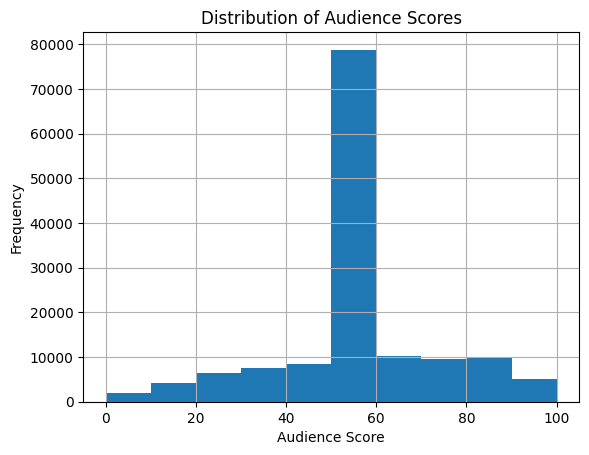

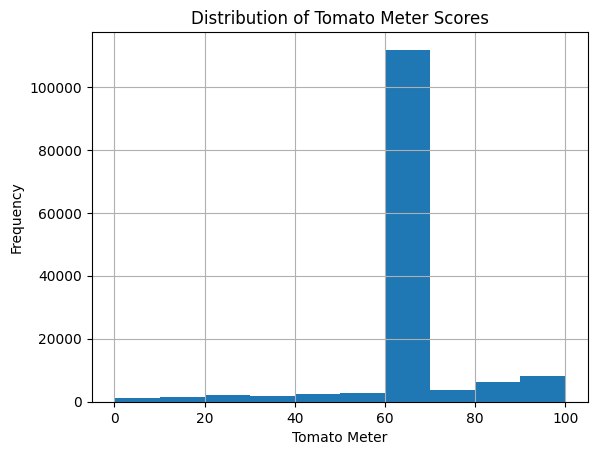

In [9]:
movies['audienceScore'].hist(bins=10)
plt.xlabel('Audience Score')
plt.ylabel('Frequency')
plt.title('Distribution of Audience Scores')
plt.show()

movies['tomatoMeter'].hist(bins=10)
plt.xlabel('Tomato Meter')
plt.ylabel('Frequency')
plt.title('Distribution of Tomato Meter Scores')
plt.show()


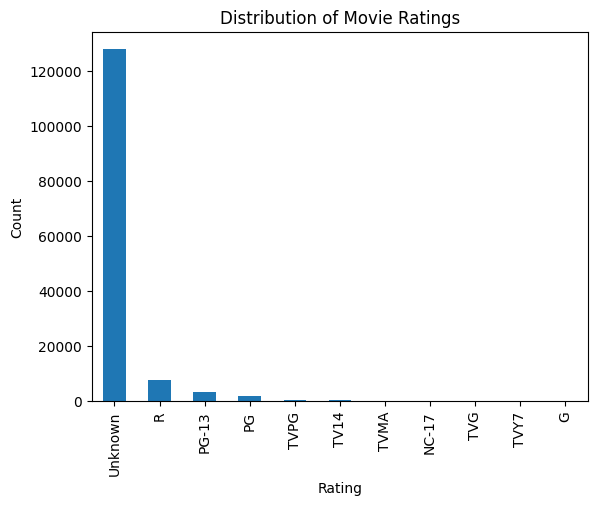

In [10]:
movies['rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.show()

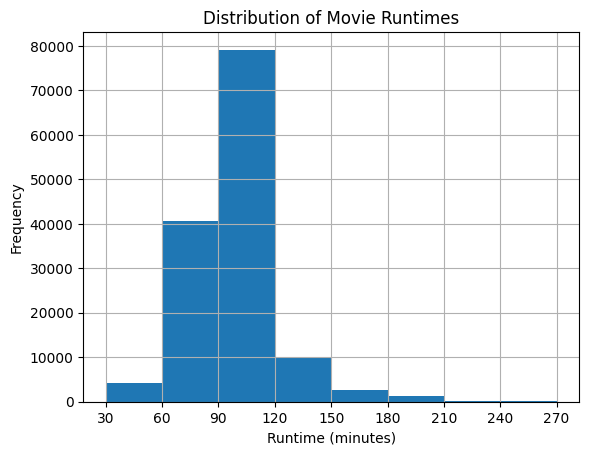

In [11]:
movies['runtimeMinutes'].hist(bins=[30*i for i in range(1,10)])
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.xticks([30*i for i in range(1,10)], [str(30*i) for i in range(1,10)])
plt.show()


In [12]:
movies['genre'].unique()

array(['Comedy, Horror, Sci-fi', 'Drama', 'Action, Mystery & thriller',
       ..., 'Action, Comedy, Fantasy, Horror, Sci-fi',
       'Fantasy, Horror, Mystery & thriller, Animation',
       'Western, Comedy, Animation'], dtype=object)

In [13]:
def clean_genres(genre_str):
    # Split genres by commas
    genres = genre_str.split(',')
    # Standardize each genre: strip spaces, make lowercase, replace '&' with 'and', and remove hyphens
    genres = [g.strip().lower().replace('&', 'and').replace('-', '').replace(' ', '') for g in genres]
    # Remove duplicates and sort
    genres = sorted(set(genres))
    return genres


In [14]:
movies['cleaned_genres'] = movies['genre'].apply(clean_genres)
movies.drop('genre', axis=1, inplace=True)


In [15]:
movies.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,runtimeMinutes,originalLanguage,director,writer,distributor,cleaned_genres
0,space-zombie-bingo,Space Zombie Bingo!,50.000000,65.764818,Unknown,Unknown,75.0,English,George Ormrod,"George Ormrod,John Sabotta",Unknown,"[comedy, horror, scifi]"
1,the_green_grass,The Green Grass,55.669356,65.764818,Unknown,Unknown,114.0,English,Tiffany Edwards,Tiffany Edwards,Unknown,[drama]
2,love_lies,"Love, Lies",43.000000,65.764818,Unknown,Unknown,120.0,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",Unknown,[drama]
3,the_sore_losers_1997,Sore Losers,60.000000,65.764818,Unknown,Unknown,90.0,English,John Michael McCarthy,John Michael McCarthy,Unknown,"[action, mysteryandthriller]"
4,dinosaur_island_2002,Dinosaur Island,70.000000,65.764818,Unknown,Unknown,80.0,English,Will Meugniot,John Loy,Unknown,"[adventure, animation, fantasy]"


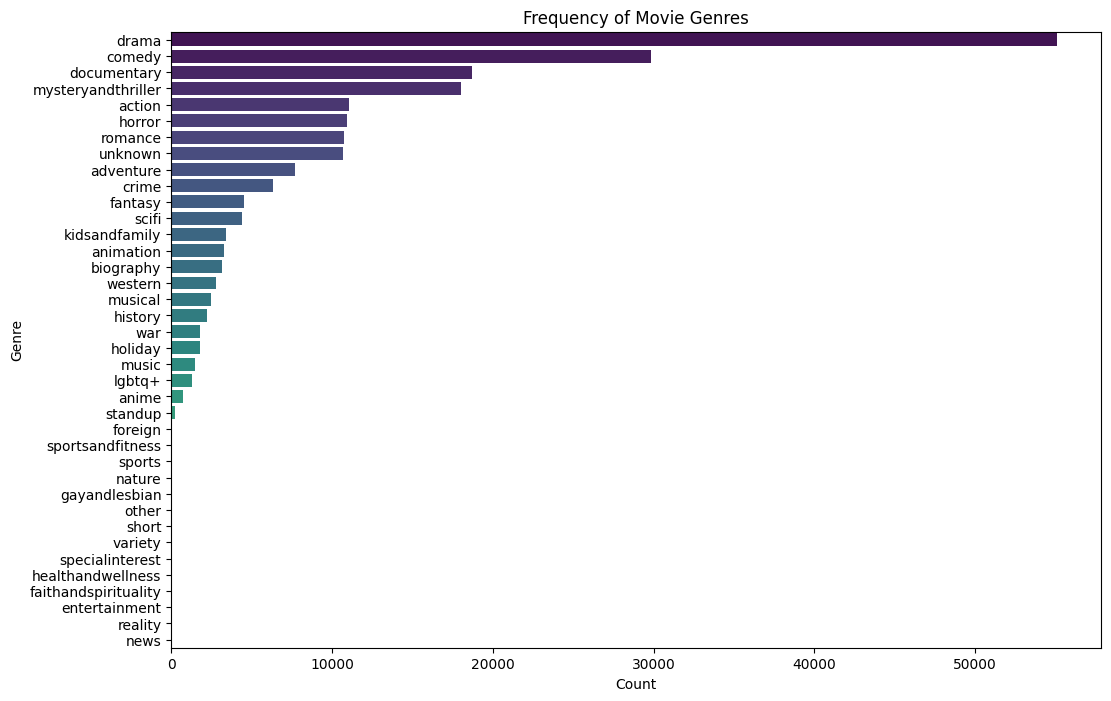

In [16]:

all_genres = [genre for sublist in movies['cleaned_genres'] for genre in sublist]

genre_counts = pd.DataFrame(all_genres, columns=['genre'])
genre_counts = genre_counts['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Plot the genre counts
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='genre', hue='genre', data=genre_counts, palette='viridis')
plt.title('Frequency of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

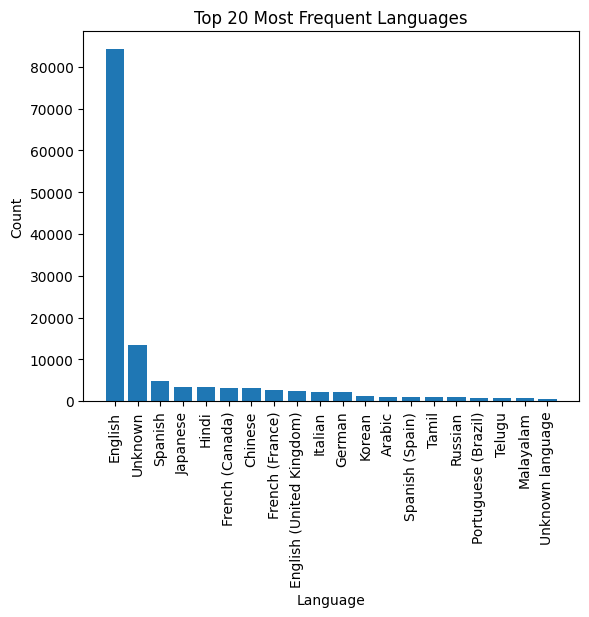

In [17]:


top_languages = movies['originalLanguage'].value_counts().head(20)
plt.bar(top_languages.index, top_languages.values)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Top 20 Most Frequent Languages')
plt.xticks(rotation=90)
plt.show()


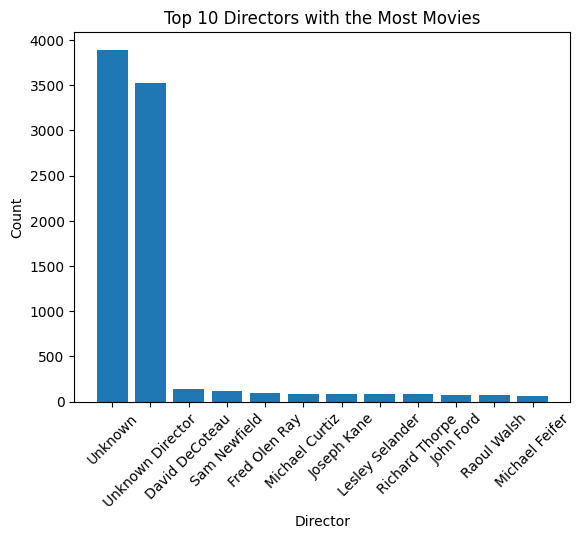

In [18]:
top_directors = movies['director'].str.split(',').explode().value_counts().head(12)
plt.bar(top_directors.index, top_directors.values)
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 10 Directors with the Most Movies')
plt.xticks(rotation=45)
plt.show()


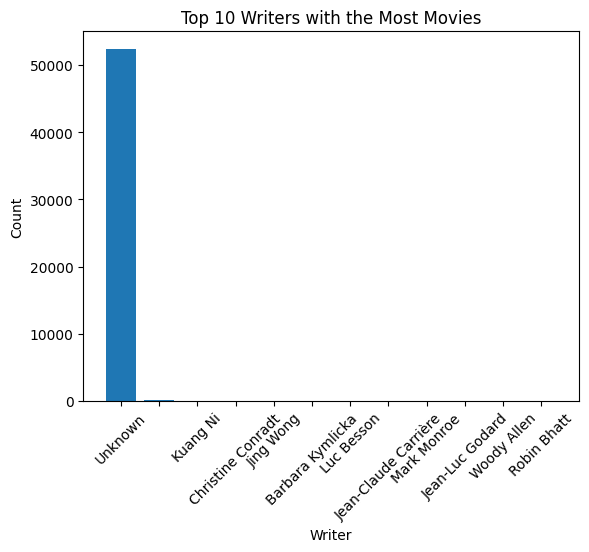

In [19]:
top_writers = movies['writer'].str.split(',').explode().value_counts().head(12)
plt.bar(top_writers.index, top_writers.values)
plt.xlabel('Writer')
plt.ylabel('Count')
plt.title('Top 10 Writers with the Most Movies')
plt.xticks(rotation=45)
plt.show()


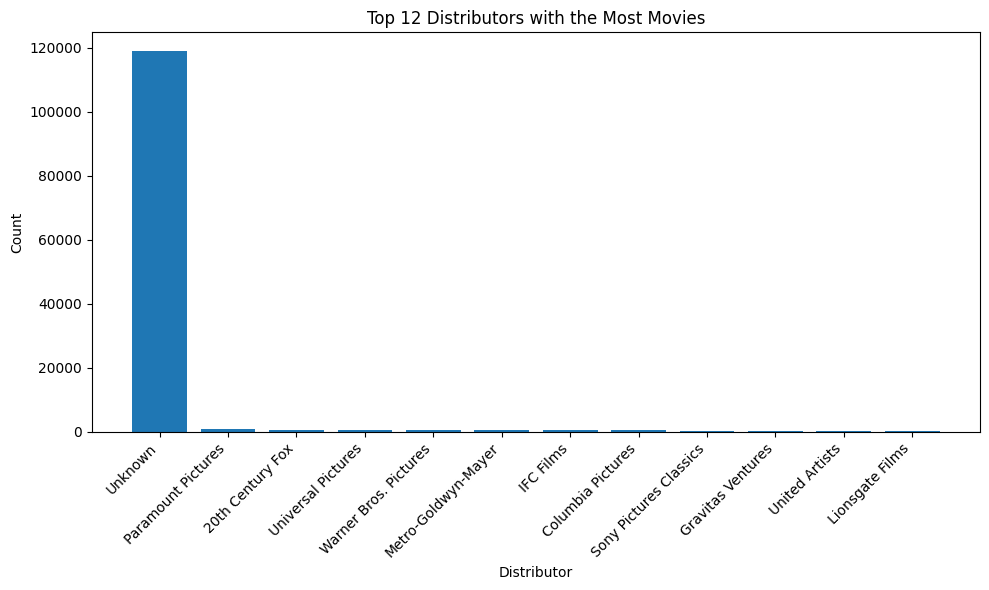

In [20]:
top_distributors = movies['distributor'].value_counts().head(12)
plt.figure(figsize=(10, 6))
plt.bar(top_distributors.index, top_distributors.values)
plt.xlabel('Distributor')
plt.ylabel('Count')
plt.title('Top 12 Distributors with the Most Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


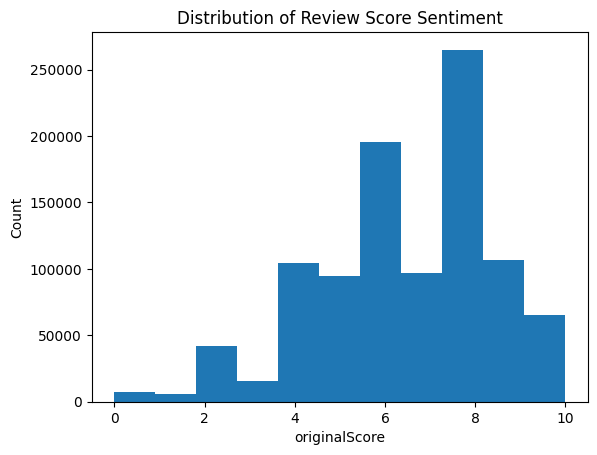

In [21]:
plt.hist(reviews['originalScore_normalized'], bins=11)

plt.xlabel('originalScore')
plt.ylabel('Count')
plt.title('Distribution of Review Score Sentiment')

plt.show()

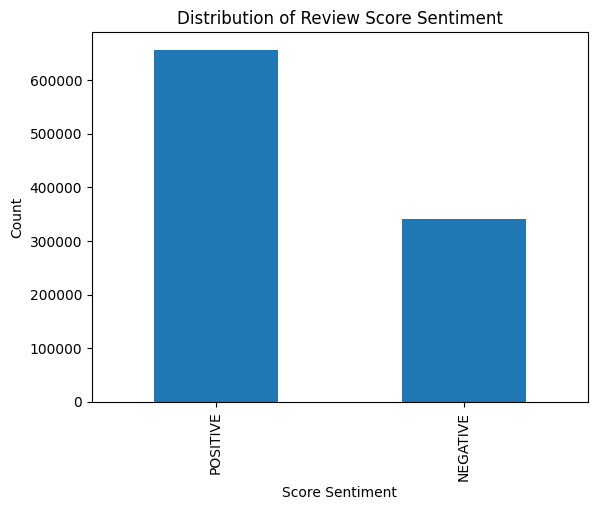

In [22]:
reviews['scoreSentiment'].value_counts().plot(kind='bar')
plt.xlabel('Score Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Review Score Sentiment')
plt.show()

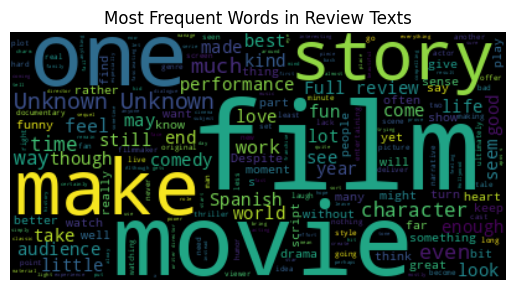

In [23]:
from wordcloud import WordCloud

text = ' '.join(reviews['reviewText'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Review Texts')
plt.show()


In [24]:
combined_df = pd.merge(movies, reviews, on='id', how='outer')

In [25]:
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080606 entries, 0 to 1080605
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1080606 non-null  object 
 1   title                     1076613 non-null  object 
 2   audienceScore             1076613 non-null  float64
 3   tomatoMeter               1076613 non-null  float64
 4   rating                    1076613 non-null  object 
 5   ratingContents            1076613 non-null  object 
 6   runtimeMinutes            1076613 non-null  float64
 7   originalLanguage          1076613 non-null  object 
 8   director                  1076613 non-null  object 
 9   writer                    1076613 non-null  object 
 10  distributor               1076613 non-null  object 
 11  cleaned_genres            1076613 non-null  object 
 12  reviewId                  997869 non-null   float64
 13  originalScore             9

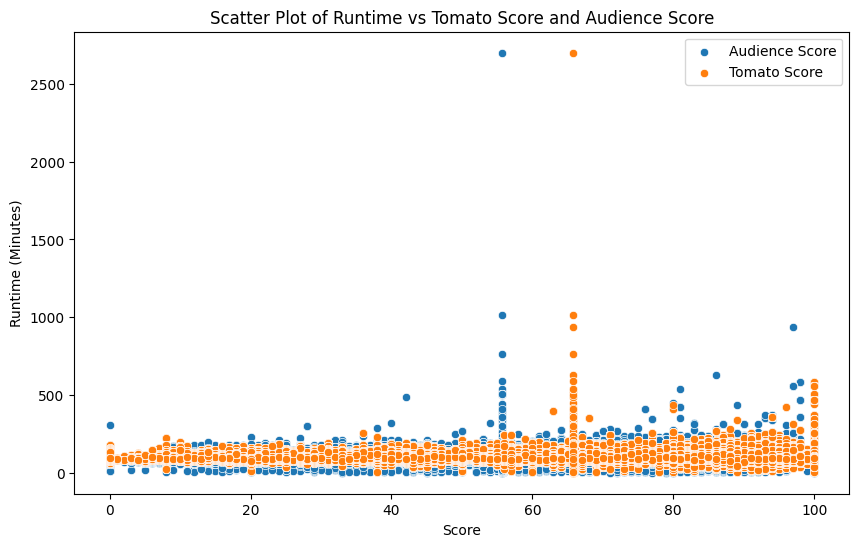

In [26]:
# Scatter plot of Runtime vs Tomato Score and Audience Score
plt.figure(figsize=(10, 6))
sns.scatterplot( x='audienceScore', y='runtimeMinutes', data=combined_df, label='Audience Score')
sns.scatterplot( x='tomatoMeter', y='runtimeMinutes',data=combined_df, label='Tomato Score')
plt.xlabel('Score')
plt.ylabel('Runtime (Minutes)')

plt.title('Scatter Plot of Runtime vs Tomato Score and Audience Score')
plt.legend()


plt.show()

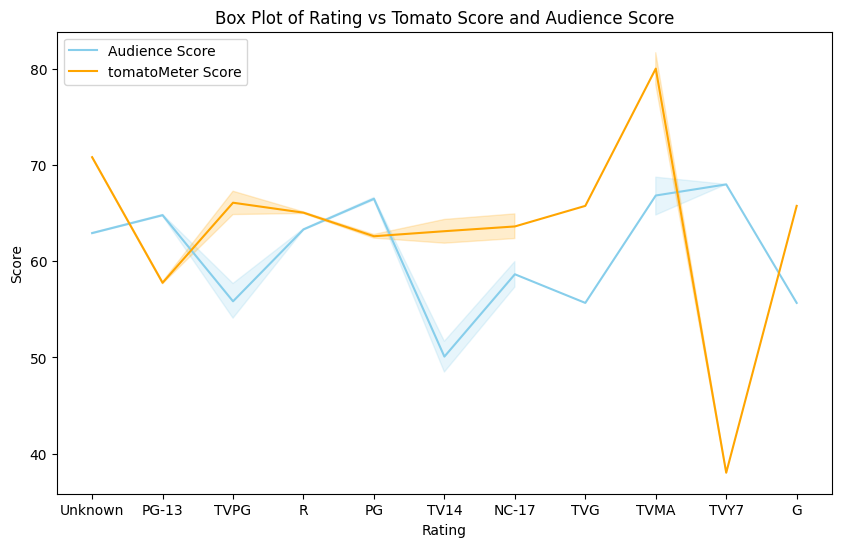

In [27]:
# Box plot of Rating vs Tomato Score and Audience Score
plt.figure(figsize=(10, 6))
sns.lineplot(x='rating', y='audienceScore', data=combined_df, color='skyblue',label='Audience Score')
sns.lineplot(x='rating', y='tomatoMeter', data=combined_df, color='orange',label='tomatoMeter Score')
plt.xlabel('Rating')
plt.ylabel('Score')
plt.title('Box Plot of Rating vs Tomato Score and Audience Score')
plt.legend()
plt.show()

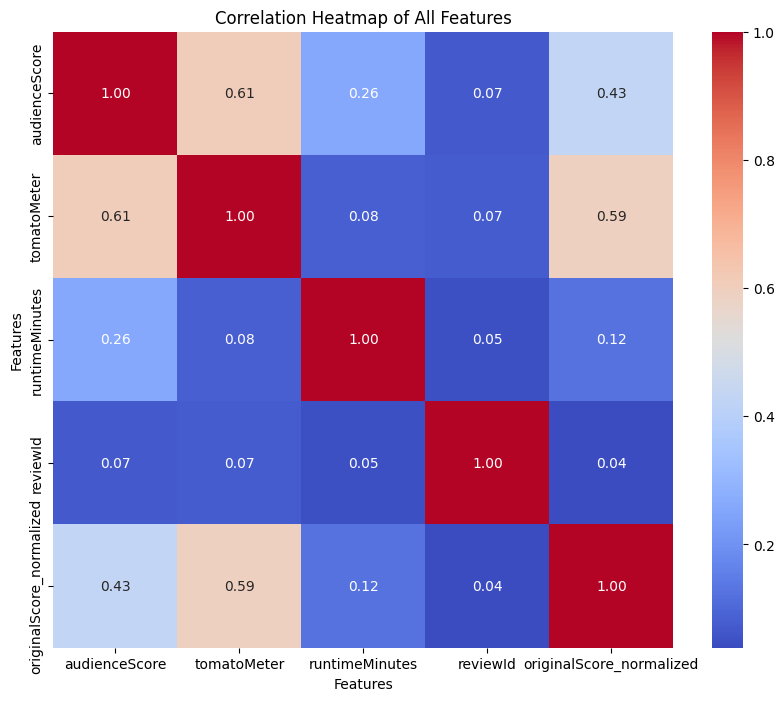

In [28]:
# Select only numeric columns
numeric_columns = combined_df.select_dtypes(include=['float64', 'int64'])

# Get the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)

# Add title and labels
plt.title('Correlation Heatmap of All Features')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the heatmap
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


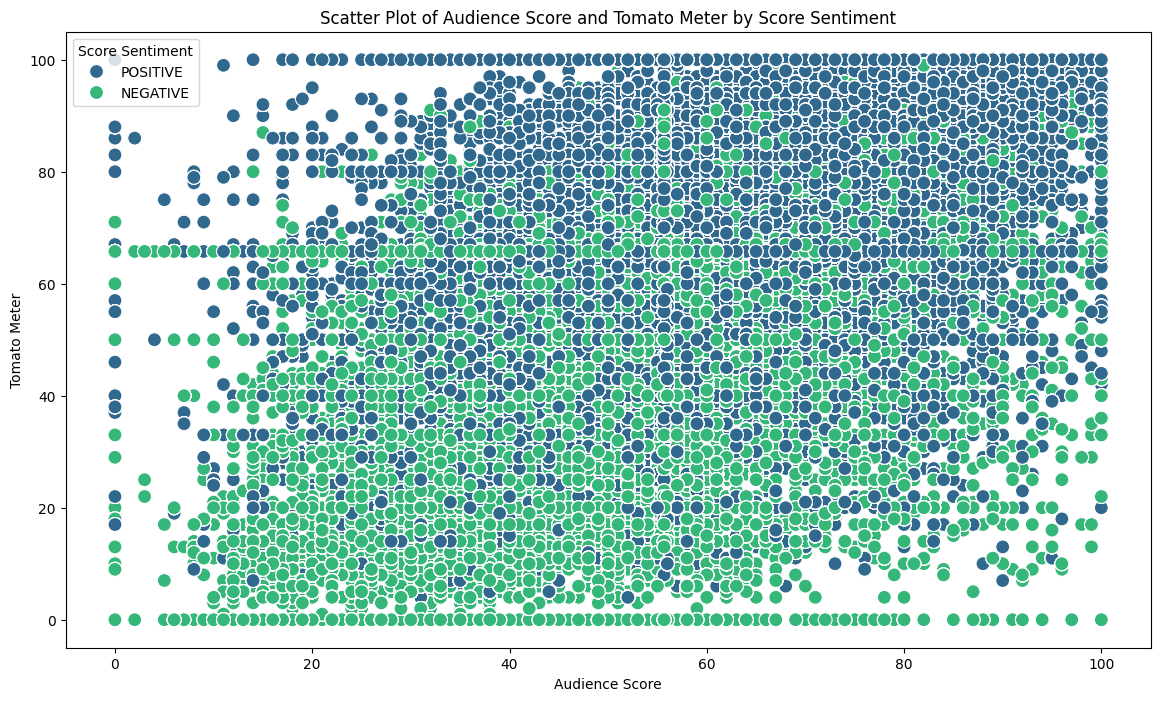

In [29]:
# Set the size of the figure
plt.figure(figsize=(14, 8))

# Scatter plot of audienceScore and tomatoMeter with hue based on scoreSentiment
sns.scatterplot(x='audienceScore', y='tomatoMeter', hue='scoreSentiment', data=combined_df, palette='viridis', s=100)
plt.xlabel('Audience Score')
plt.ylabel('Tomato Meter')
plt.title('Scatter Plot of Audience Score and Tomato Meter by Score Sentiment')
plt.legend(title='Score Sentiment')
plt.show()

In [31]:
combined_df.isnull().sum()

id                              0
title                        3993
audienceScore                3993
tomatoMeter                  3993
rating                       3993
ratingContents               3993
runtimeMinutes               3993
originalLanguage             3993
director                     3993
writer                       3993
distributor                  3993
cleaned_genres               3993
reviewId                    82737
originalScore               82737
reviewText                  82737
scoreSentiment              82737
originalScore_normalized    82737
dtype: int64

In [30]:
combined_df.to_csv("/content/drive/MyDrive/MCA_project/Final/combined_cleaned.csv", index=False)